2.6.2


2022-03-31 05:51:26.323091: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-31 05:51:26.443183: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-31 05:51:26.444285: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-31 05:51:26.447393: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

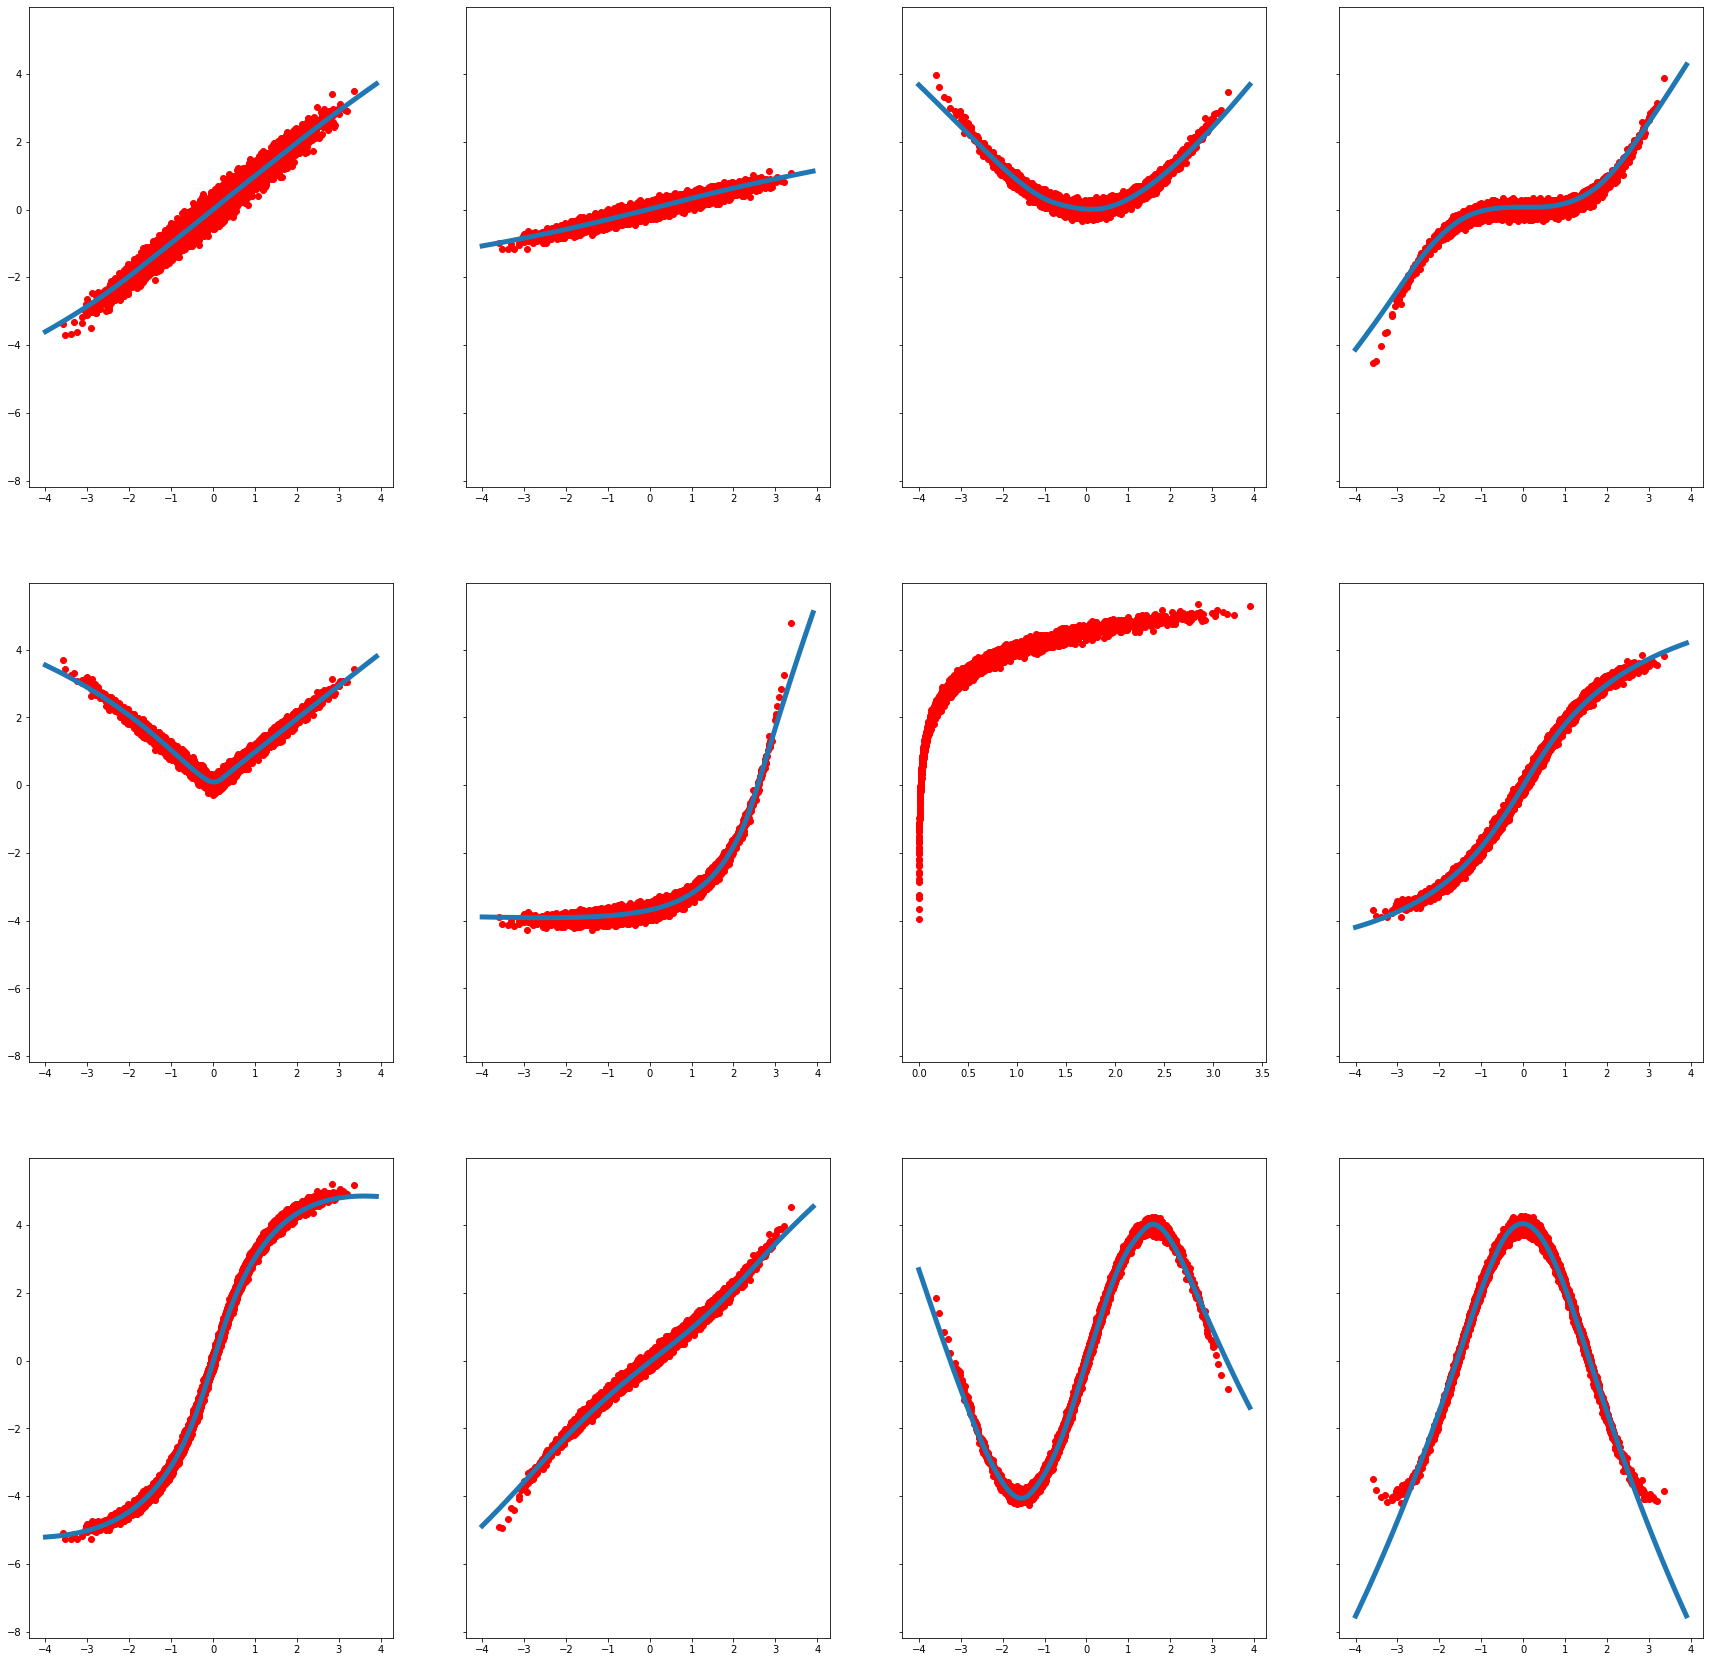

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
print(tf.__version__)
g = tf.random.Generator.from_seed(12345)
r = g.normal(shape=(10000, 1))
x = g.normal(shape=(10000, 1))
y1 = x + r * 0.2
y2 = 0.3 * x + r * 0.1
y3 = 0.3 * x * x + r * 0.1
y4 = 0.1 * x * x * x + r * 0.1
y5 = tf.math.abs(x) + r * 0.1
y6 = tf.math.exp(x) * 0.3 + r * 0.1 - 4
y7 = tf.math.log(x) + r * 0.1 + 4
y8 = tf.math.sigmoid(x) * 8 - 4 + r * 0.1
y9 = tf.math.atan(x) * 4 + r * 0.1
y10 = tf.math.tan(x / 4) * 4 + r * 0.1
y11 = tf.math.sin(x) * 4 + r * 0.1
y12 = tf.math.cos(x) * 4 + r * 0.1
y = [[y1, y2, y3, y4], [y5, y6, y7, y8], [y9, y10, y11, y12]]
t = tf.constant(np.arange(-4, 4, 0.1))
fig, axs = plt.subplots(3, 4, figsize=(30, 30), sharey=True)
for i in range(3):
    for j in range(4):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(4, input_shape=(1,), activation="elu"))
        model.add(tf.keras.layers.Dense(8, activation="elu"))
        model.add(tf.keras.layers.Dense(16, activation="elu"))
        model.add(tf.keras.layers.Dense(8, activation="elu"))
        model.add(tf.keras.layers.Dense(1))
        model.compile(optimizer="adam",loss="mse")
        model.fit(x / 5, y[i][j] / 5, 10, 10, verbose=0)
        axs[i][j].scatter(x, y[i][j], c='r')
        axs[i][j].plot(t, model.predict(t / 5) * 5, linewidth = 5.0)